In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('C:/Users/Admin/Documents/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [30]:
df.shape

(150, 6)

In [31]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [34]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [35]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:>

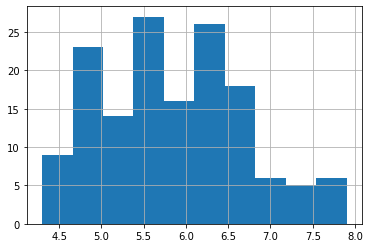

In [36]:
df['SepalLengthCm'].hist()

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [38]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Species'])
y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [41]:
model.fit(x_train, y_train)

LogisticRegression()

In [42]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [43]:
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.utils import to_categorical

In [44]:
model=Sequential()
model.add(Dense(1000,input_dim=4))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              5000      
                                                                 
 dense_5 (Dense)             (None, 500)               500500    
                                                                 
 dense_6 (Dense)             (None, 300)               150300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 903       
                                                                 
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [46]:
from keras.utils import to_categorical

In [22]:
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
6/6 [==============================] - 16s 1s/step - loss: 0.8225 - accuracy: 0.6571 - val_loss: 1.2081 - val_accuracy: 0.6889
Epoch 2/10
6/6 [==============================] - 0s 22ms/step - loss: 0.8865 - accuracy: 0.7333 - val_loss: 0.6599 - val_accuracy: 0.6222
Epoch 3/10
6/6 [==============================] - 0s 20ms/step - loss: 0.5450 - accuracy: 0.7238 - val_loss: 0.2966 - val_accuracy: 0.8889
Epoch 4/10
6/6 [==============================] - 0s 19ms/step - loss: 0.3945 - accuracy: 0.8000 - val_loss: 0.2410 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 19ms/step - loss: 0.2794 - accuracy: 0.9048 - val_loss: 0.1895 - val_accuracy: 0.9778
Epoch 6/10
6/6 [==============================] - 0s 22ms/step - loss: 0.2540 - accuracy: 0.8762 - val_loss: 0.1388 - val_accuracy: 0.9556
Epoch 7/10
6/6 [==============================] - 0s 19ms/step - loss: 0.1918 - accuracy: 0.9238 - val_loss: 0.1152 - val_accuracy: 1.0000
Epoch 8/10
6/6 [============

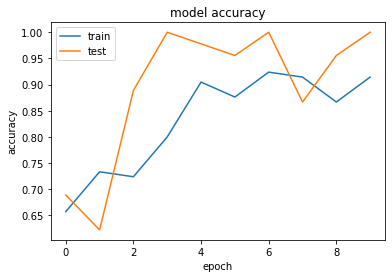

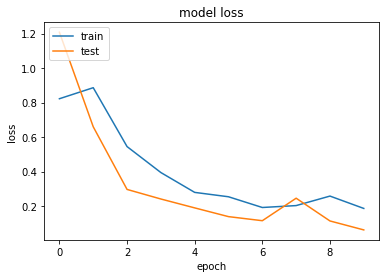

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()